<a href="https://colab.research.google.com/github/MJanbandhu/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
Use relevant machine learning model to predict total sales using features
like money spent on different marketing fields

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
data=pd.read_csv('Advertising.csv')

In [ ]:
# check for number of row and columns
data.shape

(200, 5)

In [ ]:
# print all the columns
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# print first 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# print last 5 rows
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
# find data type
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
# find info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# perform statistical analysis
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# check for missing values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
# drop unamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

# Exploratory data analysis

### Univariate analysis

<AxesSubplot:xlabel='TV', ylabel='Count'>

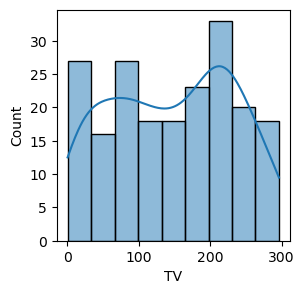

In [ ]:
# check the distribution of Tv
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='TV',kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

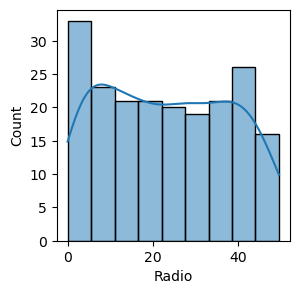

In [ ]:
# check the distribution of Radio
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='Radio',kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

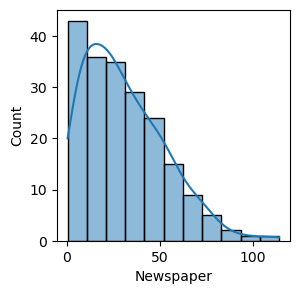

In [ ]:
# check the distribution of Newspaper
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='Newspaper',kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

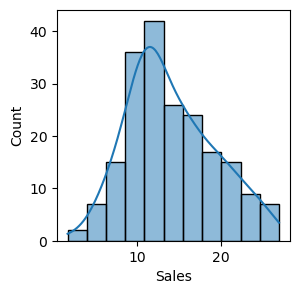

In [ ]:
# check the distribution of Sales
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='Sales',kde=True)

In [ ]:
# Insights
* Sales represents normal distribution
* TV, radio and Newspaper are representing non normal distribution.

SyntaxError: invalid syntax (3559255037.py, line 2)

## Bivariate analysis

<AxesSubplot:xlabel='TV', ylabel='Sales'>

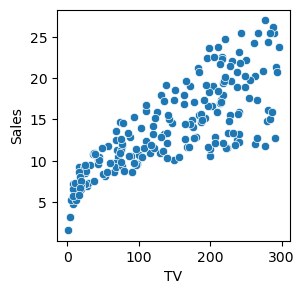

In [ ]:
# Analyse relationship between TV and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='TV',y='Sales')

In [ ]:
# Insights
* There is positive relationship between TV and sales.
* Sales increases as we increase the amount investing on TV marketing.

SyntaxError: invalid syntax (2364227827.py, line 2)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

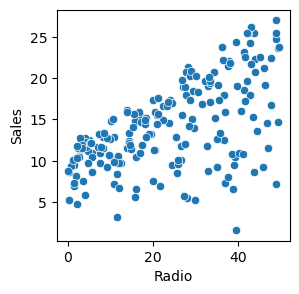

In [ ]:
# analyse relationship between Radio and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='Radio',y='Sales')

In [ ]:
# Insights
* Sales increaes as we invest more in Radio advertising.
* In some cases we could see drop in sales with high investment.

SyntaxError: invalid syntax (974566923.py, line 2)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

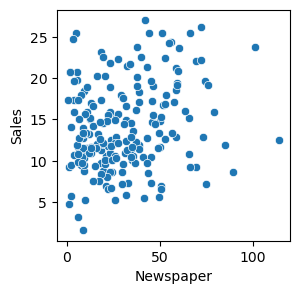

In [ ]:
# analyse relationship between Newspaper and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='Newspaper',y='Sales')

### Multivariate analysis

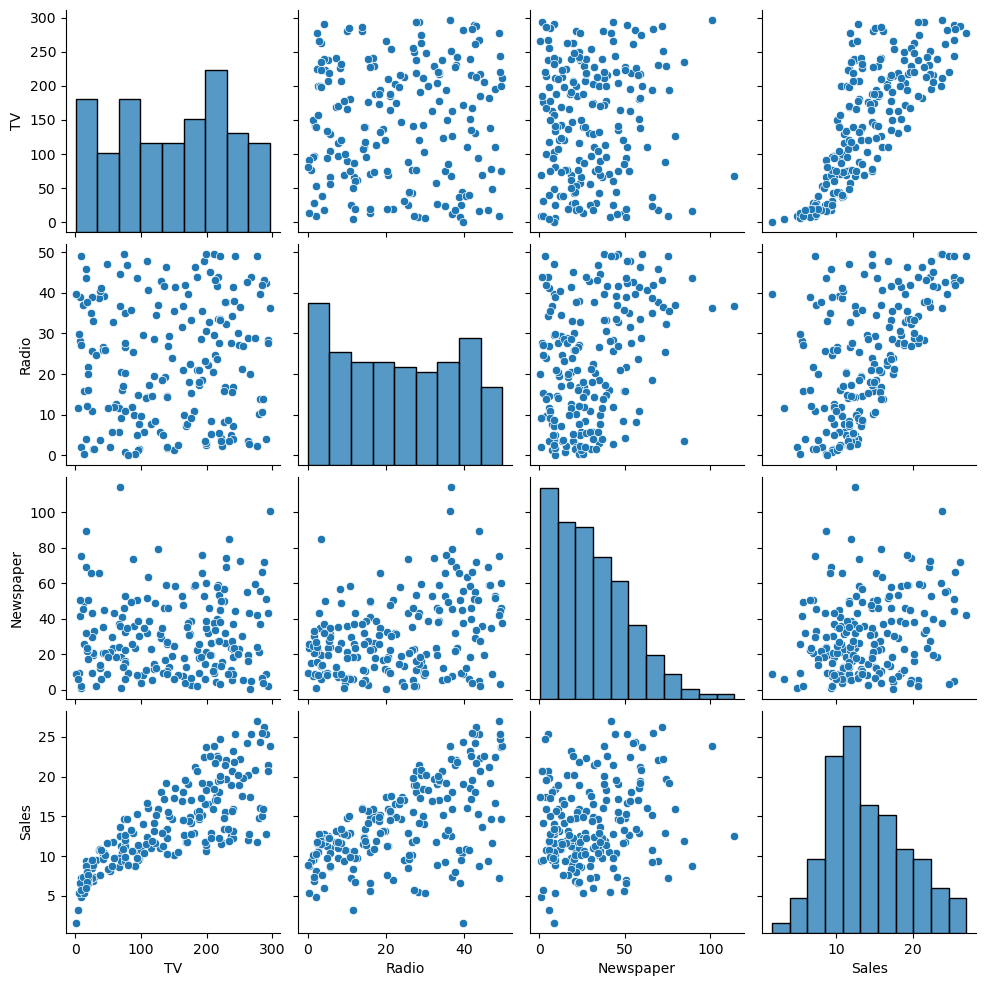

In [ ]:
sns.pairplot(data)

# Data Preprocessing

In [ ]:
# check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# check for duplicates
data.duplicated().sum()

0

# Check for Outliers and handle them

<AxesSubplot:xlabel='TV'>

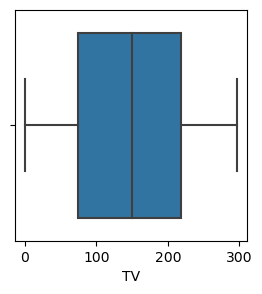

In [ ]:
# check outliers in TV
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='TV')

<AxesSubplot:xlabel='Radio'>

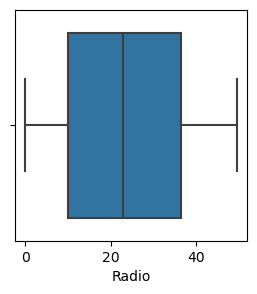

In [ ]:
# check outliers in Radio
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Radio')

<AxesSubplot:xlabel='Newspaper'>

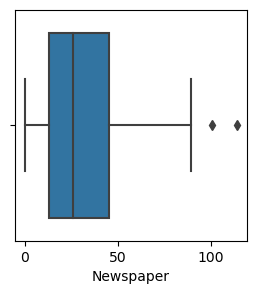

In [ ]:
# check outliers in Newspaper
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Newspaper')

<AxesSubplot:xlabel='Sales'>

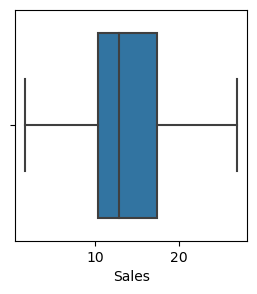

In [ ]:
# check outliers in Sales
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Sales')

# IQR Method to Handle outliers

In [ ]:
# Find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
Q3=data['Newspaper'].quantile(0.75)
# Find IQR
IQR=Q3-Q1
# Find lower limit and upper limit
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


In [ ]:
print(" Lower quartile",Q1)
print("upper quartile",Q3)
print("Inter quartile range",IQR)
print("Lower limit",lower_limit)
print("upper limit",upper_limit)

 Lower quartile 12.75
upper quartile 45.1
Inter quartile range 32.35
Lower limit -35.775000000000006
upper limit 93.625


In [ ]:
# Find values less than lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [ ]:
# find the values greater than upper limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
# Since distribuion of newspaper is not normal we replace outliers with median

In [ ]:
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

<AxesSubplot:xlabel='Newspaper'>

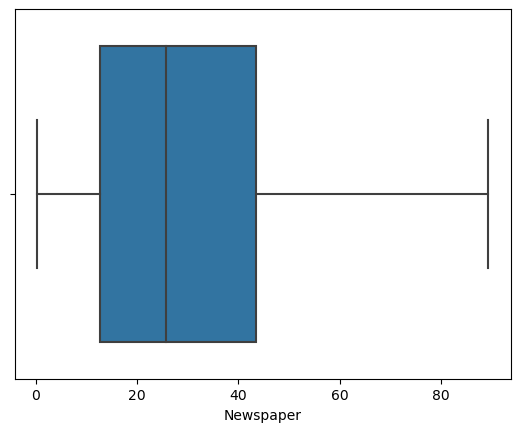

In [ ]:
sns.boxplot(data=data,x='Newspaper')

# Scaling

In [ ]:
# import minmax scaler
from sklearn.preprocessing import MinMaxScaler
# initialise minmaxscaler
scaling=MinMaxScaler()
data[['TV','Radio','Newspaper']]=scaling.fit_transform(data[['TV','Radio','Newspaper']])

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.773288,22.1
1,0.148123,0.792339,0.502806,10.4
2,0.055800,0.925403,0.774411,9.3
3,0.509976,0.832661,0.653199,18.5
4,0.609063,0.217742,0.652076,12.9
...,...,...,...,...
195,0.126818,0.074597,0.151515,7.6
196,0.316199,0.098790,0.087542,9.7
197,0.596212,0.187500,0.068462,12.8
198,0.956713,0.846774,0.739618,25.5


In [ ]:
# Skipping converting Categorical data into numerical values.

# Feature Engineering

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<AxesSubplot:>

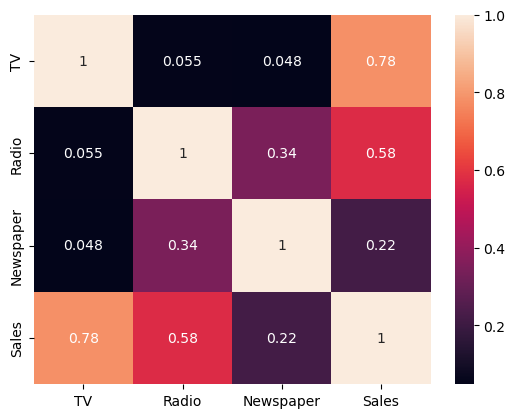

In [ ]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

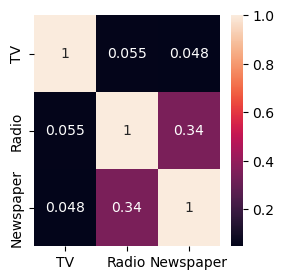

In [ ]:
# no or multicoliinearity
plt.figure(figsize=(3,3))
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [ ]:
# Split data into x and y
x=data.drop('Sales',axis=1)
y=data[['Sales']]

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train.shape

(140, 3)

# Apply Linear Regression Model

In [ ]:
# import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# train model
model.fit(x_train,y_train)
# make predictions
y_pred=model.predict(x_test)

In [ ]:
actual_value=y_test.copy()

In [ ]:
actual_value["pred"]=y_pred

In [ ]:
actual_value

,Sales,pred
11,17.4,17.119202
99,17.2,16.863431
128,24.7,21.808677
175,27.0,24.554434
1,10.4,12.315519
111,21.8,20.927422
90,11.2,10.104123
177,11.7,12.379025
88,12.9,11.995708
187,17.3,16.953691


In [ ]:
y_test

,Sales,pred
11,17.4,17.119202
99,17.2,16.863431
128,24.7,21.808677
175,27.0,24.554434
1,10.4,12.315519
111,21.8,20.927422
90,11.2,10.104123
177,11.7,12.379025
88,12.9,11.995708
187,17.3,16.953691


In [ ]:
y_test

,Sales
11,17.4
99,17.2
128,24.7
175,27.0
1,10.4
111,21.8
90,11.2
177,11.7
88,12.9
187,17.3


# Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# mean absolute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.199298085047556

In [ ]:
# Mean squared error
MSE=mean_squared_error(y_test,y_pred)
MSE

2.2044386306690202

In [ ]:
# Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

1.4847352055733778

In [ ]:
# R-squared
r2_score(y_test,y_pred)

0.9134809669573121

In [ ]:
adj=1-(1-0.913)*(60-1)/(60-3-1)
# R2=0.913
# N=60 , No of observations in y_test
# p=3 , No of independent variables

In [ ]:
adj

0.9083392857142858

In [ ]:
# Clearly adjusted r2 score < r2 score.
* The model is 91% better model to make predictions.

In [ ]:
model.predict([[10,20,10000]])

array([[4789.4915675]])